## Interpretability

In [1]:
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score

import lime
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from lime import lime_tabular
from utils import read_diabetes_dataset


### Dataset

In [2]:
X, y = read_diabetes_dataset(binary=True)

# Xa, ya = read_diabetes_dataset(binary=True)
# X = Xa.sample(25)
# y = ya[X.index]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)


In [3]:
nn = MLPClassifier(activation='logistic', solver='lbfgs', max_iter=10**3)
nn.fit(X_train, y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html


MLPClassifier(activation='logistic', max_iter=1000, solver='lbfgs')

In [4]:
auc_score = roc_auc_score(y_test, nn.predict_proba(X_test)[:,1])
print("Auc Score:", auc_score)

Auc Score: 0.6395738634927216


In [5]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['Good', 'Bad'],
    mode='classification'
)

In [6]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[1],
    predict_fn=nn.predict_proba
)

exp.show_in_notebook(show_table=True)


X does not have valid feature names, but MLPClassifier was fitted with feature names


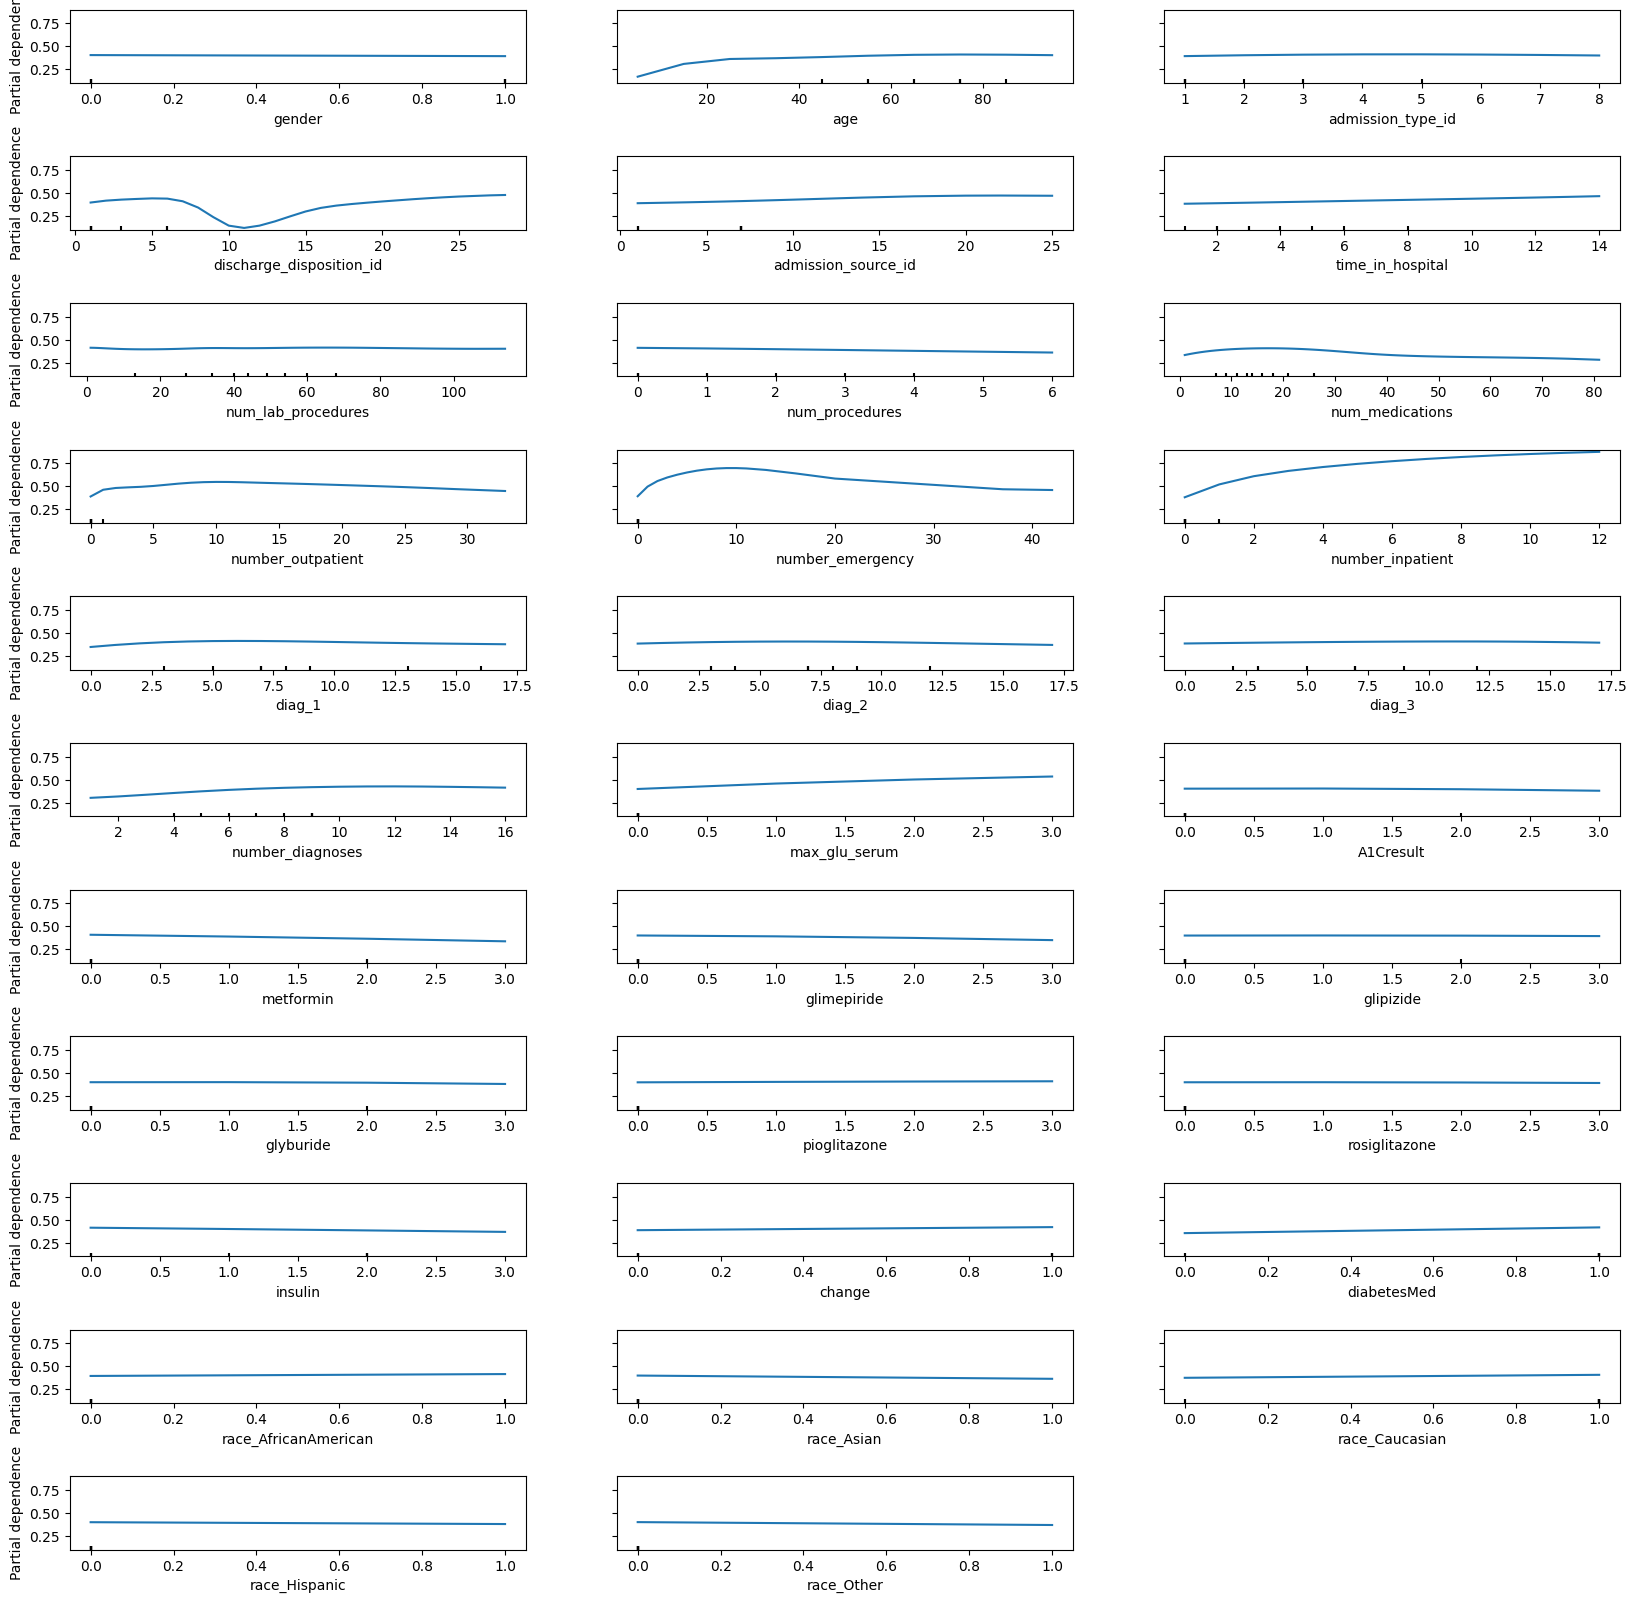

In [7]:
PartialDependenceDisplay.from_estimator(nn, X_train, X_train.columns,
                                        n_jobs=3, grid_resolution=1000)
fig = plt.gcf()
fig.set_size_inches(20, 20, forward=True)
fig.subplots_adjust(hspace=1)


In [8]:
def f(x):
    x = pd.DataFrame(data=x, columns=X.columns)
    return nn.predict_proba(x)[:, 1]


med = X_test.median().values.reshape((1, X_test.shape[1]))
explainer = shap.Explainer(f, med)
shap_values = explainer(X_test)


Permutation explainer: 21457it [17:47, 19.97it/s]                           


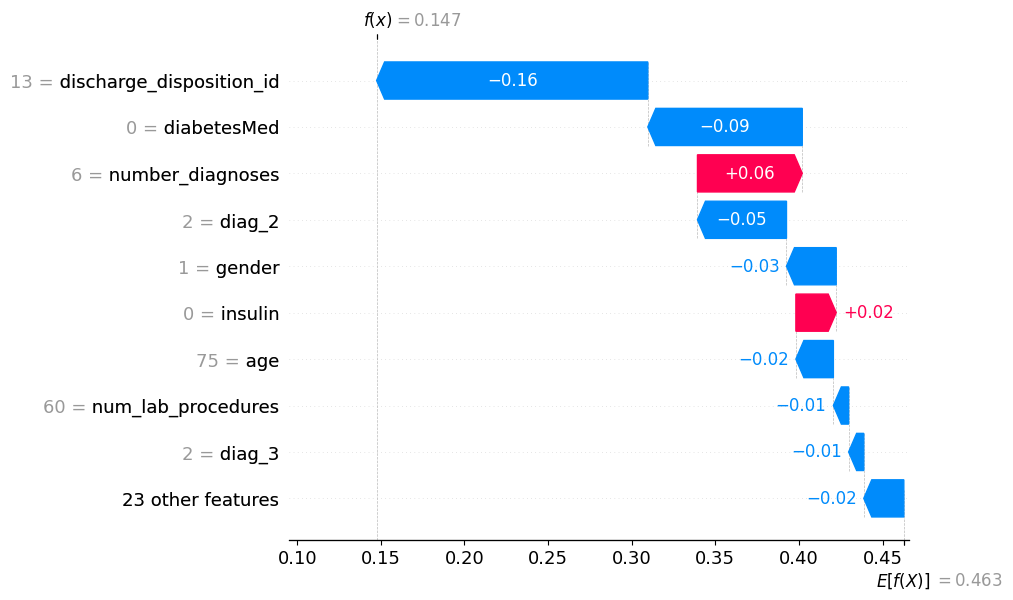

In [9]:
shap.plots.waterfall(shap_values[1])